 # **TAŞKIN VE KURAKLIK HİDROLOJİSİ İSTASYON VERİSİ İŞLEME DEFTERİ**





Hazırlanan bu python defterinde Seyhan Havzası Eğlence Deresi istasyonu  akış verileri kullanılarak taşkın ve kuraklık analizi yapılmıştır..

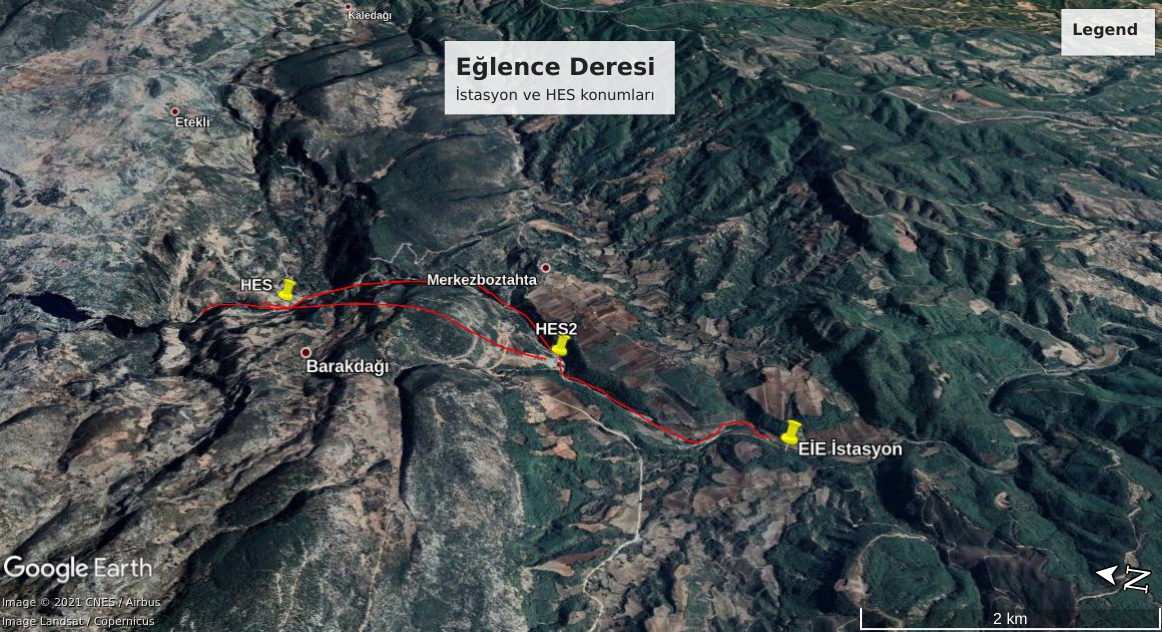

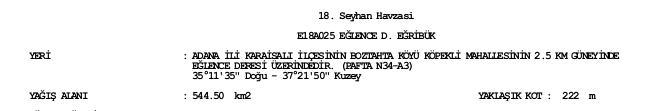

Bölge haritası ve istasyon bilgileri yukarıdaki gibidir. Bölgede 2013 yılında faaliyete geçmiş HES yapısı olduğu tespit edilmiş ve bu yüzden 1988-2012 arası 25 yıllık bir veri seti kullanılmıştır. İstasyon verisi DSİ resmi istatistik portalından alınmıştır.

#**1.TAŞKIN ANALİZİ**

##1.1 Verinin hazırlanması, görüntülenmesi ve bazı istatistik hesapları

Gerekli Kütüphaneler



In [ ]:
import numpy as np
import pandas as pd
import statsmodels.tsa.stattools as sta  
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
from sklearn.linear_model import LinearRegression
!pip install pymannkendall 
import pymannkendall as mk

In [2]:
DataFrame=pd.read_csv("DataFrame.csv")

DSİ'den çekilen istasyon verisi hesaplamalar için büyükten küçüğe sıralanmıştır ve aşağıdaki gibidir:

In [3]:
DataFrame

,Yıl,Yıllık Maksimum Akış(m3/s)
0,2001,577.0
1,2002,354.0
2,1988,354.0
3,2003,329.0
4,2010,327.0
5,2000,317.0
6,1990,294.0
7,1993,289.0
8,2009,245.0
9,2004,243.0


Veri Yıllara göre akış grafiği çizmek için aşağıda kronolojik olarak sıralanmıştır:

In [4]:
years=DataFrame["Yıl"]
taskinDebi=DataFrame["Yıllık Maksimum Akış(m3/s)"]

In [5]:
df=DataFrame.sort_values(by=['Yıl'], inplace=False, ascending=True)
print(df)

     Yıl  Yıllık Maksimum Akış(m3/s)
2   1988                       354.0
19  1989                       120.0
6   1990                       294.0
21  1991                       107.0
12  1992                       184.0
7   1993                       289.0
18  1994                       140.0
10  1995                       243.0
11  1996                       212.0
14  1997                       167.0
20  1998                       118.0
13  1999                       179.0
5   2000                       317.0
0   2001                       577.0
1   2002                       354.0
3   2003                       329.0
9   2004                       243.0
24  2005                        26.0
23  2006                        45.5
16  2007                       165.0
22  2008                       100.0
8   2009                       245.0
4   2010                       327.0
15  2011                       165.0
17  2012                       157.0


YILLARA GÖRE MAKSİMUM AKIŞ GRAFİĞİ

Text(0.5, 1.0, 'Yıllara Göre Yıllık Maksimum Akış Grafiği')

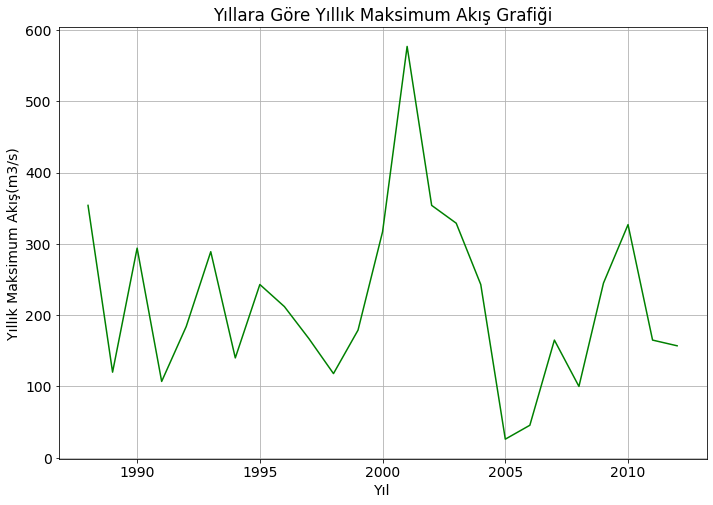

In [6]:
plt.rcParams.update({'font.size': 14})
Figur1=plt.figure()
figureAxes1 = Figur1.add_axes([0.6,0.6,1.5,1.5])
figureAxes1.plot(df['Yıl'],df['Yıllık Maksimum Akış(m3/s)'],"g",); plt.grid()
figureAxes1.set_xlabel("Yıl")
figureAxes1.set_ylabel("Yıllık Maksimum Akış(m3/s)")
figureAxes1.set_title("Yıllara Göre Yıllık Maksimum Akış Grafiği")

Hazırlanan verinin bazı istatistik parametreleri aşağıdaki aşağıdaki gibidir:

In [7]:

DataFrame["Yıllık Maksimum Akış(m3/s)"].describe()

count     25.000000
mean     218.300000
std      120.047907
min       26.000000
25%      140.000000
50%      184.000000
75%      294.000000
max      577.000000
Name: Yıllık Maksimum Akış(m3/s), dtype: float64

In [8]:
describe=DataFrame["Yıllık Maksimum Akış(m3/s)"].describe();
X25=describe.iloc[6];
X50=describe.iloc[5];
X75=describe.iloc[4];
mean=DataFrame["Yıllık Maksimum Akış(m3/s)"].mean()
var=DataFrame["Yıllık Maksimum Akış(m3/s)"].var()
std=DataFrame["Yıllık Maksimum Akış(m3/s)"].std()
N=DataFrame["Yıl"].size

#1.2 Frekansın Hesaplanması

In [9]:
y=pd.DataFrame(range(1,26))
p=np.array(y/(1+N)) #Weibull aşılma olasılığı

Text(0.5, 1.0, 'Frekans')

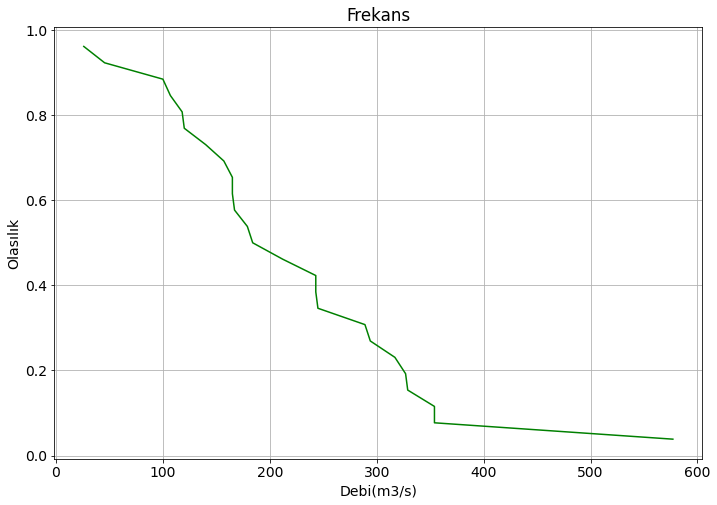

In [10]:

Figur2=plt.figure()
figureAxes2 = Figur2.add_axes([0.6,0.6,1.5,1.5])
figureAxes2.plot(DataFrame['Yıllık Maksimum Akış(m3/s)'],p,"g"); plt.grid()
figureAxes2.set_xlabel("Debi(m3/s)")
figureAxes2.set_ylabel("Olasılık")
figureAxes2.set_title("Frekans")


#1.3 Olasılık Dağılımlarının Parametreleri ve Parametrelerin Tahmini


**Csx Hesaplanması**


In [58]:
def get_Csx(Debi):
  N=len(Debi)
  eps=0
  mean=Debi.mean()
  std=Debi.std()
  for i in Debi:
      eps=eps+(i-mean)**3
      
  Csx= (N/((N-1)*(N-2)))*eps/std**3
  return Csx


In [11]:

eps=0
for i in DataFrame["Yıllık Maksimum Akış(m3/s)"]:
    eps=eps+(i-mean)**3
    

Csx= (N/((N-1)*(N-2)))*eps/std**3


In [12]:
Csx


0.9705563283474762

**L Momentlerinin Tahmini**

In [13]:
#İlk önce b0 b1 b2 ve b3 olasılık ağırlıklı momentleri asaıdaki gibi hesaplanır:

b0=mean;

#b1 hesabı
lmo=0
i=1
for j in taskinDebi:
  lmo=lmo+(N-i)*j/(N*(N-1))
  if i==N-1:
    break
  i=i+1
b1=lmo;

#b2 hesabı
lmo=0
i=1
for j in taskinDebi:
  lmo=lmo+(N-i)*(N-i-1)*j/(N*(N-1)*(N-2))
  if i==N-2:
    break
  i=i+1
b2=lmo;

#b3 hesabı
lmo=0
i=1
for j in taskinDebi:
  lmo=lmo+(N-i)*(N-i-1)*(N-i-2)*j/(N*(N-1)*(N-2)*(N-3))
  if i==N-3:
    break
  i=i+1
b3=lmo;



#L-momentleri olasılık ağırlıklı momentler kullanılarak aşağıdaki gibi hesaplanabilir:
L1=b0;
L2=2*b1-b0;
L3=6*b2-6*b1+b0;
L4=20*b3-30*b2+12*b1-b0;
print( "YAPILAN HESAPLARA GORE BULUNAN DEGERLER" "\n"
"""--------------------------------------------------------------------\n \n"""

"Olasılık Ağırlıklı Momentler:" "\n"
"b0=",b0,",", "b1=",b1, ",","b2=",b2, ",","b3=",b3, "," "\n"
       
"""--------------------------------------------------------------------\n \n"""

"L Momentleri:" "\n"
"L1=",L1,"L2=",L2,"L3=",L3,"L4=",L4, "\n \n"

"""-------------------------------------------------------------------- \n \n""")

YAPILAN HESAPLARA GORE BULUNAN DEGERLER
--------------------------------------------------------------------
 
Olasılık Ağırlıklı Momentler:
b0= 218.3 , b1= 142.34583333333333 , b2= 107.48623188405799 , b3= 87.23254940711465 ,
--------------------------------------------------------------------
 
L Momentleri:
L1= 218.3 L2= 66.39166666666665 L3= 9.142391304347882 L4= 9.914031620553658 
 
-------------------------------------------------------------------- 
 



In [14]:
#İlk önce b0 b1 b2 ve b3 olasılık ağırlıklı momentleri asaıdaki gibi hesaplanır:
def L_moment(Debi):
  N=len(Debi)
  b0=Debi.mean();

  #b1 hesabı
  lmo=0
  i=1
  for j in Debi:
    lmo=lmo+(N-i)*j/(N*(N-1))
    if i==N-1:
      break
    i=i+1
  b1=lmo;

  #b2 hesabı
  lmo=0
  i=1
  for j in Debi:
    lmo=lmo+(N-i)*(N-i-1)*j/(N*(N-1)*(N-2))
    if i==N-2:
      break
    i=i+1
  b2=lmo;

  #b3 hesabı
  lmo=0
  i=1
  for j in Debi:
    lmo=lmo+(N-i)*(N-i-1)*(N-i-2)*j/(N*(N-1)*(N-2)*(N-3))
    if i==N-3:
      break
    i=i+1
  b3=lmo;



  #L-momentleri olasılık ağırlıklı momentler kullanılarak aşağıdaki gibi hesaplanabilir:
  L1=b0;
  L2=2*b1-b0;
  L3=6*b2-6*b1+b0;
  L4=20*b3-30*b2+12*b1-b0;
  return print( "YAPILAN HESAPLARA GORE BULUNAN DEGERLER" "\n"
"""--------------------------------------------------------------------\n \n"""

"Olasılık Ağırlıklı Momentler:" "\n"
"b0=",b0,",", "b1=",b1, ",","b2=",b2, ",","b3=",b3, "," "\n"
       
"""--------------------------------------------------------------------\n \n"""

"L Momentleri:" "\n"
"L1=",L1,"L2=",L2,"L3=",L3,"L4=",L4, "\n \n"

"""-------------------------------------------------------------------- \n \n""")

L Moment Oranları

In [15]:
LCv=L2/L1; #L-Değişim Katsayısı
Lkurtosis=L4/L2 #L-Kurtosis Katsayısı
LCs=L3/L2 #L-Çarpıklık Katsayısı
print("LCv:",LCv,"Lkurtosis:",Lkurtosis,"LCs:",LCs)

LCv: 0.3041304015880286 Lkurtosis: 0.14932644589763264 LCs: 0.13770389814506667


#1.4 Teorik Olasılık Dağılımlarının Çizilmesi

Teorik olasılık dağılımları Excel'de hesaplanmış ve Ödev 3 olarak yüklenmiştir.

#1.5 TREND ANALİZİ


Zaman serisine Mann-Kendaltrend testi uygulanmıştır. 

In [16]:
#  Mann-Kendal Testini içeren pymannkendal kütüphanesi kullanıldı.  
# Kütüphane dökümanları incelendi. Formüllerin ders notundakilerle aynı olduğu görüldü.
data=df["Yıllık Maksimum Akış(m3/s)"]
mk.original_test(data)# Mann-Kendal Trend Analizi fonksiyonu uygulanmıştır.
trend, h, p, z, Tau, s, var_s, slope, intercept= mk.hamed_rao_modification_test(data,lag=1) # çıktı değerleri değişkene atandı.
print("Trend:",trend) #Trend 
print("Z değeri:",z) #Z Değeri
print("Tau değeri:",Tau)
print("sigma:",np.sqrt(var_s))

Trend: no trend
Z değeri: -0.5609784100510774
Tau değeri: -0.08333333333333333
sigma: 42.782395133200914


#1.5.1 İÇ BAĞIMLILIĞIN ETKİSİNİN GİDERİLMESİ 

Zaman serisinde iç bağımlılık olup olmadığını belirlemek için zaman    serisinin    1 aralıklı  serisel korelasyon  katsayısı testte dikkate alınmalıdır. 

In [17]:
#  Mann-Kendal Testini içeren pymannkendal kütüphanesi kullanıldı.  
# Kütüphane dökümanları incelendi. Formüllerin ders notundakilerle aynı olduğu görüldü.
#Otokorelasyon 1 aralıklı olarak hesaplanmıştır.
def __acf(x, nlags):
    y = x - x.mean()
    n = len(x)
    d = n * np.ones(2 * n - 1)
    
    acov = (np.correlate(y, y, 'full') / d)[n - 1:]
    
    return acov[:nlags+1]/acov[0]
print("Otokorelasyon Katsayısı:",__acf(data,1)[1],"olarak hesaplandı")  

Otokorelasyon Katsayısı: 0.3271133585446807 olarak hesaplandı


In [18]:
#  Mann-Kendal Testini içeren pymannkendal kütüphanesi kullanıldı.  
# Kütüphane dökümanları incelendi. Formüllerin ders notundakilerle aynı olduğu görüldü.
data=df["Yıllık Maksimum Akış(m3/s)"]
mk.hamed_rao_modification_test(data,lag=1) #1 zaman aralıklı otokorelasyon dikkate alındı ve test uygulandı.
trend, h, p, z, Tau, s, var_s, slope, intercept= mk.hamed_rao_modification_test(data,lag=1) # çıktı değerleri değişkene atandı.
print("#################MANN-KENDAL TESTİ SONUÇ#################")
print("Trend:",trend) #Trend 
print("Z değeri:",z) #Z Değeri
print("Tau değeri:",Tau)
print("sigma:",np.sqrt(var_s))



#################MANN-KENDAL TESTİ SONUÇ#################
Trend: no trend
Z değeri: -0.5609784100510774
Tau değeri: -0.08333333333333333
sigma: 42.782395133200914


#1.5.2 İÇ BAĞIMLILIĞIN ETKİSİNİN GİDERİLMESİ (YUE,WANG) VE MANN-KENDAL TESTİNİN UYGULANMASI

Trend analizinde Yue-Wang metodu kullanılarak trend eğimi ve  otokorelasyon dikkate alınarak oluşturulmuş zaman serisi dikkate alınarak  yeni bir seri oluşturulmuş ve bu seri tekrar teste sokulmuştur.

In [19]:
#  Mann-Kendal Testini içeren pymannkendal kütüphanesi kullanıldı.  
# Kütüphane dökümanları incelendi. Formüllerin ders notundakilerle aynı olduğu görüldü.
data=df["Yıllık Maksimum Akış(m3/s)"]
mk.yue_wang_modification_test(data,lag=1) #yue wang metoduna data sokuldu 
trend, h, p, z, Tau, s, var_s, slope, intercept= mk.yue_wang_modification_test(data,lag=1) # çıktı değerleri değişkene atandı.
print("#################MANN-KENDAL TESTİ SONUÇ#################")
print("Trend:",trend) #Trend 
print("Z değeri:",z) #Z Değeri
print("Tau değeri:",Tau)
print("sigma:",np.sqrt(var_s))


#################MANN-KENDAL TESTİ SONUÇ#################
Trend: no trend
Z değeri: -0.4389454548510463
Tau değeri: -0.08333333333333333
sigma: 54.676497352374376


#**2. KURAKLIK ANALİZİ**

# 2.1 Verinin hazırlanması Ve Görüntülenmesi

In [20]:
minDebi=[2.14,1.62,1.71,1.37,1.62,1.95,1.54,1.71,1.95,2.2,1.95,1.95,1.78,1.7,1.86,2.13,0.099,1.45,1.09,1.07,0.946,1.20,1.79,1.81,1.50]

In [52]:
DF=pd.read_csv("concattt.csv") #Günlük Ortalama akışlar bütün yılların tabloları yanyana getirilerek import edildi.
#Her bir kolon, kronolojik olarak sıralı su yılının  aylarına denk gelmektedir.

In [22]:
DF

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,...,Unnamed: 260,Unnamed: 261,Unnamed: 262,Unnamed: 263,Unnamed: 264,Unnamed: 265,Unnamed: 266,Unnamed: 267,Unnamed: 268,Unnamed: 269,Unnamed: 270,Unnamed: 271,Unnamed: 272,Unnamed: 273,Unnamed: 274,Unnamed: 275,Unnamed: 276,Unnamed: 277,Unnamed: 278,Unnamed: 279,Unnamed: 280,Unnamed: 281,Unnamed: 282,Unnamed: 283,Unnamed: 284,Unnamed: 285,Unnamed: 286,Unnamed: 287,Unnamed: 288,Unnamed: 289,Unnamed: 290,Unnamed: 291,Unnamed: 292,Unnamed: 293,Unnamed: 294,Unnamed: 295,Unnamed: 296,Unnamed: 297,Unnamed: 298,Unnamed: 299
0,2.14,4.40,3.00,14.90,61.80,29.0,30.3,40.5,11.90,5.66,3.22,2.30,2.30,5.66,5.03,8.48,7.07,9.42,6.60,4.40,2.99,2.13,1.79,1.62,2.13,2.13,22.30,10.40,3.45,142.0,18.50,10.00,5.56,3.09,2.05,2.05,2.31,2.05,2.05,2.05,...,7.54,3.22,2.13,1.79,1.79,3.22,2.99,10.80,10.7,22.10,18.50,12.80,5.08,3.54,2.47,2.09,2.28,2.47,2.09,7.69,12.10,16.9,14.7,18.7,11.20,5.00,2.77,2.37,2.23,2.23,2.04,5.11,11.10,30.0,34.2,16.00,6.80,3.37,2.88,2.04
1,2.14,4.12,3.28,15.60,25.60,27.3,26.5,34.1,11.90,5.66,3.22,2.30,2.30,9.42,5.03,8.01,7.07,9.42,7.07,4.40,2.99,2.13,1.79,1.79,2.30,2.13,15.00,8.95,3.45,50.5,15.80,8.06,5.56,3.09,2.05,2.05,2.05,2.05,1.88,2.05,...,7.07,3.22,1.96,1.79,1.79,6.28,2.76,10.40,10.7,20.30,16.70,12.30,5.08,3.54,2.47,2.09,2.47,2.47,2.09,7.32,11.20,15.2,15.2,20.0,10.80,4.73,2.77,2.37,2.23,2.23,1.84,6.11,10.20,23.2,24.6,16.00,6.11,3.37,2.63,2.04
2,2.14,3.56,3.00,14.20,15.60,28.2,28.4,25.5,10.40,5.34,2.99,2.53,2.30,11.90,5.03,7.54,6.60,9.42,7.07,4.40,2.99,2.13,1.79,1.79,2.13,2.13,12.50,8.48,3.45,41.8,12.70,6.94,5.10,3.09,2.05,2.05,2.05,2.05,1.88,2.05,...,6.60,3.22,1.96,1.79,1.79,7.07,2.99,10.80,34.3,20.30,14.90,11.90,5.08,3.31,2.28,2.28,3.08,2.47,2.09,6.95,10.30,14.2,19.4,19.4,10.30,4.73,2.77,2.37,2.23,2.23,1.84,5.42,9.71,19.7,24.6,19.10,6.46,3.12,2.43,2.04
3,2.14,3.84,3.28,14.90,14.20,29.0,28.4,23.9,9.42,5.34,2.99,2.30,2.30,8.01,5.03,7.07,6.60,8.95,7.07,4.40,2.76,2.13,1.79,1.79,4.39,2.13,9.89,7.54,3.45,35.5,11.40,8.06,4.75,2.83,2.05,2.05,2.05,2.05,2.31,2.57,...,6.60,3.45,1.96,1.79,1.79,7.54,3.22,10.40,29.0,17.60,14.00,11.90,5.08,3.31,2.28,2.28,2.47,2.28,2.09,6.95,9.90,13.1,16.9,18.1,9.90,4.46,2.99,2.37,2.23,2.43,1.84,5.11,9.24,17.2,26.9,18.40,5.77,3.12,2.43,2.04
4,2.14,6.35,3.28,13.00,13.00,28.2,24.7,22.3,9.42,5.03,2.99,2.30,2.30,6.29,4.71,7.07,7.07,8.95,6.60,4.40,2.76,2.13,1.79,1.79,2.53,1.96,8.48,5.34,3.45,36.8,11.40,7.40,4.40,2.83,2.05,4.05,2.05,2.05,3.09,2.05,...,6.60,5.66,1.96,1.79,1.79,67.80,3.22,9.89,23.0,15.80,12.00,11.40,4.81,3.08,2.66,2.09,2.47,2.28,2.09,6.63,9.50,12.6,15.2,18.7,10.80,4.46,2.77,2.37,2.23,2.43,1.84,5.11,9.71,15.5,28.4,19.10,5.77,3.12,2.43,2.04
5,2.14,8.30,3.00,13.00,12.50,26.5,26.5,21.5,8.95,5.03,2.99,2.30,2.30,9.42,4.71,6.60,7.54,9.42,7.07,4.40,2.76,2.13,1.79,1.79,2.53,1.96,7.54,5.34,3.45,30.0,12.00,6.48,4.40,2.57,2.05,2.31,2.05,2.05,4.40,2.05,...,6.28,5.03,1.96,1.79,1.79,16.30,3.45,8.95,19.4,14.00,11.40,10.90,4.81,3.08,2.47,2.09,2.47,2.28,2.09,6.31,9.10,12.6,14.7,32.1,10.30,4.46,2.77,2.37,2.04,2.23,1.84,4.80,10.20,14.9,30.0,17.20,5.42,2.88,2.43,1.84
6,2.14,7.52,2.78,13.00,11.90,26.5,39.4,20.7,8.95,4.71,2.99,2.53,2.30,41.60,4.71,6.60,8.01,9.42,7.07,4.08,2.76,2.13,1.79,1.79,2.76,1.96,6.60,5.03,3.45,25.0,12.70,6.48,4.40,2.57,2.05,2.05,2.05,2.31,2.83,2.05,...,5.97,4.39,2.30,1.79,1.79,10.40,3.45,7.07,16.7,13.30,12.00,10.50,5.08,3.08,2.47,2.85,2.47,2.28,2.09,6.63,9.10,13.1,15.2,23.4,9.50,4.19,2.77,2.18,2.04,2.23,1.84,12.70,11.60,14.9,31.6,16.00,5.11,2.88,2.43,1.84
7,2.14,6.35,2.57,12.50,11.40,25.6,41.6,19.9,8.48,4.40,2.76,2.99,2.53,24.70,4.71,7.0

In [23]:
#su yılı tablosunun bütün ay kolonları alt alta yazıldı.
oneCol=[]
colLength=DF.shape[1]
for k in range(0,colLength):
  oneCol.append(DF.iloc[:,k])

df1 = pd.concat(oneCol, ignore_index=True)
df1=df1.dropna()

df1=pd.DataFrame(df1.values)

In [24]:
Q=[]
#1 haftalık ortalamalar baştan sona bütün seriye uygulandı.
for i in range(len(df1)-7):
  toplam=[]
  for j in range(7):
      toplam.append(df1.iloc[i+j,0])
  Q.append(sum(toplam)/len(toplam))

Q=pd.Series(Q)

#Her bir yılın 7 günlük ortalama  minimum değerleri bulundu.
Q_7=[]
for i in range(25): # 25 yıl için
  Q_7.append(Q[(0+365*i):((358-1)+365*i)].min())



In [49]:
yıl=(range(1988,2013))
tablo = {'Yıl':yıl,
    '1 Günlük Min': minDebi,
        '7 Günlük Min': Q_7
         }
tablo=pd.DataFrame(tablo)
tablo

,Yıl,1 Günlük Min,7 Günlük Min
0,1988,2.140,2.140000
1,1989,1.620,1.620000
2,1990,1.710,1.734286
3,1991,1.370,1.688571
4,1992,1.620,2.200000
5,1993,1.950,1.950000
6,1994,1.540,1.564286
7,1995,1.710,1.710000
8,1996,1.950,2.200000
9,1997,2.200,2.450000


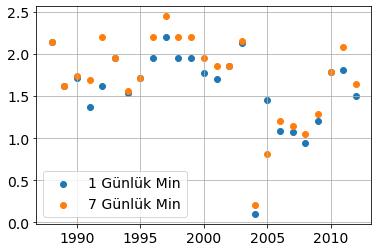

In [50]:
plt.scatter(tablo["Yıl"],tablo['1 Günlük Min'],label='1 Günlük Min');plt.grid()
plt.scatter(tablo['Yıl'],tablo['7 Günlük Min'],label='7 Günlük Min')
plt.legend()

Serini bazı istastistik parametreleri aşağıdaki gibidir:

In [27]:
tablo['7 Günlük Min'].describe()

count    25.000000
mean      1.707846
std       0.520743
min       0.205571
25%       1.564286
50%       1.790000
75%       2.140000
max       2.450000
Name: 7 Günlük Min, dtype: float64

#2.2 Frekansın Hesaplanması

In [28]:
y=pd.Series((25,24,23,22,21,20,19,18,17,16,15,14,13,12,11,10,9,8,7,6,5,4,3,2,1))

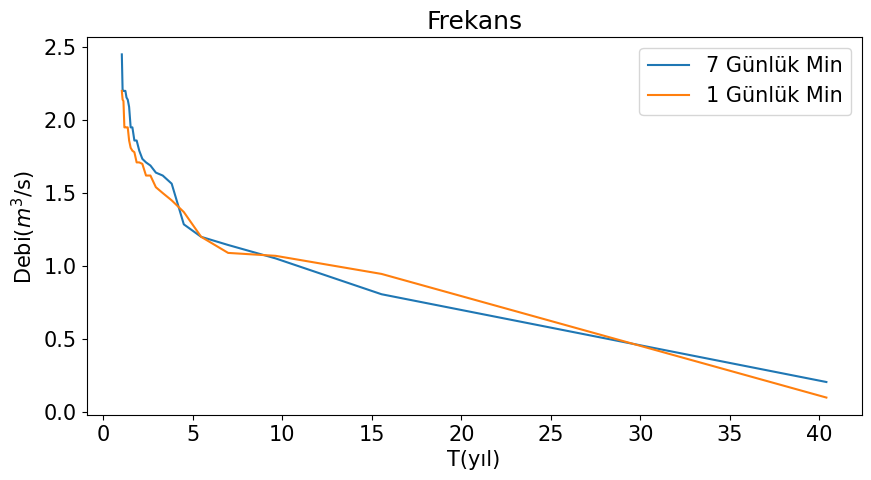

In [66]:
mi=tablo['7 Günlük Min'].sort_values( inplace=False, ascending=False)
mii=tablo['1 Günlük Min'].sort_values( inplace=False, ascending=False)
a=0.375
T=(25+1-2*a)/(y-a)
plt.figure(figsize=(10, 5), dpi=100)
plt.rcParams.update({'font.size': 15})
plt.plot(T,mi,label='7 Günlük Min')
plt.plot(T,mii,label='1 Günlük Min')
plt.xlabel("T(yıl)")
plt.ylabel("Debi($m^3$/s) ")
plt.title("Frekans")
plt.legend()


# 2.2 Olasılık Dağılımlarının Parametreleri Ve Parametrelerin Tahmini

 2.2.1 Csx Hesaplanması

In [61]:
print("Csx:",get_Csx(tablo['7 Günlük Min']))  #Taşkın analizi bölümünde yazılan fonksiyon tekrar çağırılmıştır.

Csx: -1.1692060384357967


In [30]:
L_moment(tablo['7 Günlük Min']) # Taşkın analizi için yazılan L momentleri bulma programı tekrar çağırıldı.


YAPILAN HESAPLARA GORE BULUNAN DEGERLER
--------------------------------------------------------------------
 
Olasılık Ağırlıklı Momentler:
b0= 1.7078457142857144 , b1= 0.912767142857143 , b2= 0.6273150310559007 , b3= 0.47334559006211174 ,
--------------------------------------------------------------------
 
L Momentleri:
L1= 1.7078457142857144 L2= 0.11768857142857159 L3= -0.004866956521739407 L4= -0.10717913043478555 
 
-------------------------------------------------------------------- 
 

